self attention module: It shortens the distance between any two inputs significantly to enhance the learning ability of long-term dependence.

doing min max scaler, testdata=std_x_test.reshape(82332,194), x_train=x_train.values() are the ways to get data into 2d vector

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
Test = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_testing-set.csv.zip')
Train = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_training-set.csv.zip')

In [3]:
Train.shape

(82332, 45)

In [4]:
Test.shape

(175341, 45)

In [5]:
Test=Test.drop(['label'],axis=1)

In [6]:
Train=Train.drop(['label'],axis=1)

In [7]:
Test.shape

(175341, 44)

In [8]:
Train.shape

(82332, 44)

In [9]:
Train['attack_cat'] = Train['attack_cat'].replace(['Normal'], 0)
Train['attack_cat'] = Train['attack_cat'].replace(['Reconnaissance'], 1)
Train['attack_cat'] = Train['attack_cat'].replace(['Backdoor'], 2)
Train['attack_cat'] = Train['attack_cat'].replace(['DoS'], 3)
Train['attack_cat'] = Train['attack_cat'].replace(['Exploits'], 4)
Train['attack_cat'] = Train['attack_cat'].replace(['Analysis'], 5)
Train['attack_cat'] = Train['attack_cat'].replace(['Fuzzers'], 6)
Train['attack_cat'] = Train['attack_cat'].replace(['Worms'], 7)
Train['attack_cat'] = Train['attack_cat'].replace(['Shellcode'], 8)
Train['attack_cat'] = Train['attack_cat'].replace(['Generic'], 9)

In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [11]:
set(Train['attack_cat'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
Train["Class"]=Train.apply('attack_cat',axis=1)
Train=Train.drop("attack_cat",axis=1)

In [13]:
Train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,Class
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,1,2,0,0,0,2,1,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,1,0,0,0,3,2,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,1,0,0,0,1,1,1,0


In [14]:
Test['attack_cat'] = Test['attack_cat'].replace(['Normal'], 0)
Test['attack_cat'] = Test['attack_cat'].replace(['Reconnaissance'], 1)
Test['attack_cat'] = Test['attack_cat'].replace(['Backdoor'],2)
Test['attack_cat'] = Test['attack_cat'].replace(['DoS'], 3)
Test['attack_cat'] = Test['attack_cat'].replace(['Exploits'], 4)
Test['attack_cat'] = Test['attack_cat'].replace(['Analysis'], 5)
Test['attack_cat'] = Test['attack_cat'].replace(['Fuzzers'], 6)
Test['attack_cat'] = Test['attack_cat'].replace(['Worms'], 7)
Test['attack_cat'] = Test['attack_cat'].replace(['Shellcode'], 8)
Test['attack_cat'] = Test['attack_cat'].replace(['Generic'], 9)

In [15]:
Test["Class"]=Test.apply('attack_cat',axis=1)
Test=Test.drop("attack_cat",axis=1)

In [16]:
Test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,Class
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,24,13,24,0,0,0,24,24,0,9
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,1,2,0,0,0,1,1,0,8
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,3,13,0,0,0,3,12,0,9
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,30,14,30,0,0,0,30,30,0,9


In [17]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [18]:
Test['Class'].astype(int)
Train['Class'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: Class, Length: 82332, dtype: int32

In [19]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

<Axes: xlabel='Class', ylabel='count'>

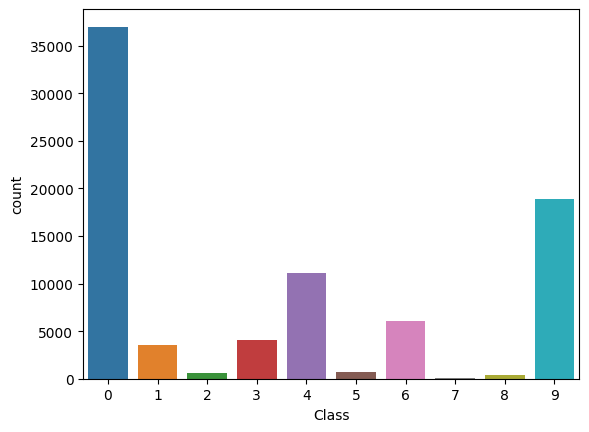

In [20]:

import seaborn as sns
sns.countplot(x=Train['Class'])

In [21]:
X_train = Train.iloc[:,:-1]
y_train = Train.iloc[:,-1]

In [22]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [23]:
set(X_train['proto'])

{'3pc',
 'a/n',
 'aes-sp3-d',
 'any',
 'argus',
 'aris',
 'arp',
 'ax.25',
 'bbn-rcc',
 'bna',
 'br-sat-mon',
 'cbt',
 'cftp',
 'chaos',
 'compaq-peer',
 'cphb',
 'cpnx',
 'crtp',
 'crudp',
 'dcn',
 'ddp',
 'ddx',
 'dgp',
 'egp',
 'eigrp',
 'emcon',
 'encap',
 'etherip',
 'fc',
 'fire',
 'ggp',
 'gmtp',
 'gre',
 'hmp',
 'i-nlsp',
 'iatp',
 'ib',
 'idpr',
 'idpr-cmtp',
 'idrp',
 'ifmp',
 'igmp',
 'igp',
 'il',
 'ip',
 'ipcomp',
 'ipcv',
 'ipip',
 'iplt',
 'ipnip',
 'ippc',
 'ipv6',
 'ipv6-frag',
 'ipv6-no',
 'ipv6-opts',
 'ipv6-route',
 'ipx-n-ip',
 'irtp',
 'isis',
 'iso-ip',
 'iso-tp4',
 'kryptolan',
 'l2tp',
 'larp',
 'leaf-1',
 'leaf-2',
 'merit-inp',
 'mfe-nsp',
 'mhrp',
 'micp',
 'mobile',
 'mtp',
 'mux',
 'narp',
 'netblt',
 'nsfnet-igp',
 'nvp',
 'ospf',
 'pgm',
 'pim',
 'pipe',
 'pnni',
 'pri-enc',
 'prm',
 'ptp',
 'pup',
 'pvp',
 'qnx',
 'rdp',
 'rsvp',
 'rvd',
 'sat-expak',
 'sat-mon',
 'sccopmce',
 'scps',
 'sctp',
 'sdrp',
 'secure-vmtp',
 'sep',
 'skip',
 'sm',
 'smp',
 's

In [24]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
X_train['proto_e'] = label_encoder.fit_transform(X_train['proto'])

# Apply label encoding to 'service' column
X_train['service_e'] = label_encoder.fit_transform(X_train['service'])

# Apply label encoding to 'state' column
X_train['state_e'] = label_encoder.fit_transform(X_train['state'])
# Drop the original columns
X_train.drop(columns=['proto', 'service', 'state'], inplace=True)

In [25]:
set(X_train['proto_e'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130}

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [27]:
y_train.shape

(82332,)

In [28]:
X_train.shape

(82332, 43)

In [29]:
y_train.shape

(82332,)

<Axes: xlabel='Class', ylabel='count'>

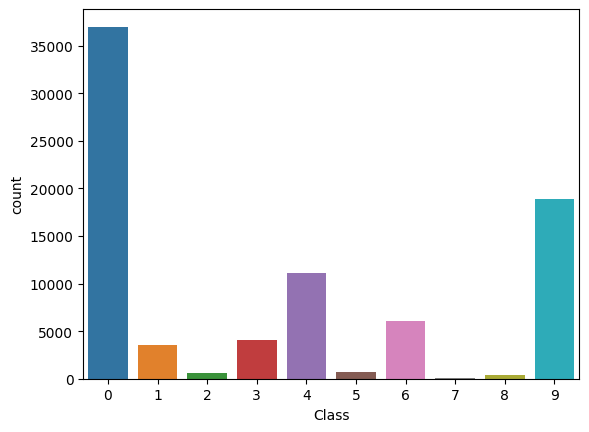

In [30]:
sns.countplot(x=y_train)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

test data spliting

In [32]:
X_test = Test.iloc[:,:-1]
y_test = Test.iloc[:,-1]

In [33]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [34]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
X_test['proto_e'] = label_encoder.fit_transform(X_test['proto'])

# Apply label encoding to 'service' column
X_test['service_e'] = label_encoder.fit_transform(X_test['service'])

# Apply label encoding to 'state' column
X_test['state_e'] = label_encoder.fit_transform(X_test['state'])
# Drop the original columns
X_test.drop(columns=['proto', 'service', 'state'], inplace=True)

In [35]:
'''import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming you have the following data:
# X_train: Input data with shape (num_samples, num_features)
# y_train: Target labels with shape (num_samples,)

# Check the class distribution before oversampling
print("Original class distribution:", Counter(y_train))

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Reshape y_train to have 1D shape (num_samples,)
y_train = np.reshape(y_train, (-1,))

# Perform the oversampling
x_train, y_train = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Oversampled class distribution:", Counter(y_train))'''

'import numpy as np\nfrom collections import Counter\nfrom imblearn.over_sampling import RandomOverSampler\n\n# Assuming you have the following data:\n# X_train: Input data with shape (num_samples, num_features)\n# y_train: Target labels with shape (num_samples,)\n\n# Check the class distribution before oversampling\nprint("Original class distribution:", Counter(y_train))\n\n# Create an instance of RandomOverSampler\nros = RandomOverSampler(random_state=42)\n\n# Reshape y_train to have 1D shape (num_samples,)\ny_train = np.reshape(y_train, (-1,))\n\n# Perform the oversampling\nx_train, y_train = ros.fit_resample(X_train, y_train)\n\n# Check the class distribution after oversampling\nprint("Oversampled class distribution:", Counter(y_train))'

In [36]:
'''import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming you have the following data:
# X_train: Input data with shape (num_samples, num_features)
# y_train: Target labels with shape (num_samples,)

# Check the class distribution before oversampling
print("Original class distribution:", Counter(y_test))

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Reshape y_train to have 1D shape (num_samples,)
y_test = np.reshape(y_test, (-1,))

# Perform the oversampling
x_test, y_test = ros.fit_resample(X_test, y_test)

# Check the class distribution after oversampling
print("Oversampled class distribution:", Counter(y_test))'''

'import numpy as np\nfrom collections import Counter\nfrom imblearn.over_sampling import RandomOverSampler\n\n# Assuming you have the following data:\n# X_train: Input data with shape (num_samples, num_features)\n# y_train: Target labels with shape (num_samples,)\n\n# Check the class distribution before oversampling\nprint("Original class distribution:", Counter(y_test))\n\n# Create an instance of RandomOverSampler\nros = RandomOverSampler(random_state=42)\n\n# Reshape y_train to have 1D shape (num_samples,)\ny_test = np.reshape(y_test, (-1,))\n\n# Perform the oversampling\nx_test, y_test = ros.fit_resample(X_test, y_test)\n\n# Check the class distribution after oversampling\nprint("Oversampled class distribution:", Counter(y_test))'

In [37]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming you have the following data:
# X_train: Input data with shape (num_samples, num_features)
# y_train: Target labels with shape (num_samples,)

# Check the class distribution before oversampling
print("Original class distribution:", Counter(y_train))

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Reshape y_train to have 1D shape (num_samples,)
y_train = np.reshape(y_train, (-1,))

# Perform the oversampling
X_train , y_train = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Oversampled class distribution:", Counter(y_train))


Original class distribution: Counter({0: 37000, 9: 18871, 4: 11132, 6: 6062, 3: 4089, 1: 3496, 5: 677, 2: 583, 8: 378, 7: 44})
Oversampled class distribution: Counter({0: 37000, 1: 37000, 2: 37000, 3: 37000, 4: 37000, 5: 37000, 6: 37000, 7: 37000, 8: 37000, 9: 37000})


<Axes: ylabel='count'>

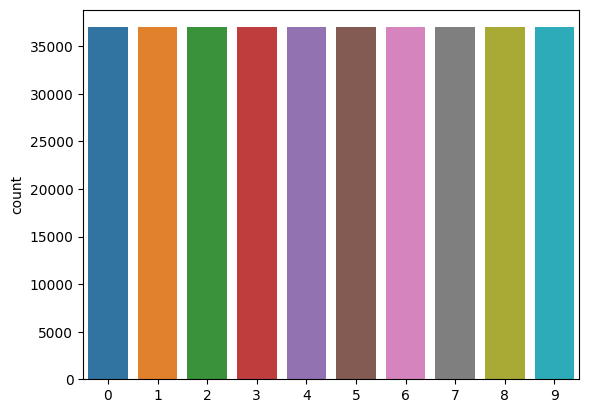

In [38]:
sns.countplot(x=y_train)

<Axes: xlabel='Class', ylabel='count'>

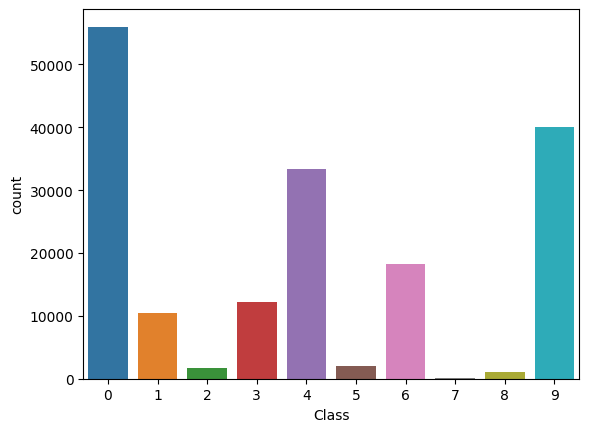

In [39]:
sns.countplot(x=y_test)

In [40]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [41]:
x_train.shape

(370000, 43)

In [42]:
'''import numpy as np
x_train=np.concatenate((x_train, x_test))
y_train=np.concatenate((y_train, y_test))'''

'import numpy as np\nx_train=np.concatenate((x_train, x_test))\ny_train=np.concatenate((y_train, y_test))'

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Softmax, Reshape, Multiply, Add, Concatenate, Flatten
from tensorflow.keras.models import Model

num_samples, num_features = x_train.shape

inp = Input(shape=(num_samples,num_features, 1))  # Adjust input shape for Conv2D

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, reduction=16):
        super(ChannelAttention, self).__init__()
        self.reduction = reduction
        self.avg_pool = GlobalAveragePooling2D(data_format='channels_last')  # Update data format
        self.fc = Dense(1, activation='relu')  # Use 1 output unit for channel attention
        self.sigmoid = tf.keras.layers.Activation('sigmoid')

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc(y)
        y = self.sigmoid(y)
        y = tf.expand_dims(y, axis=1)  # Add an axis for channels (updated axis=1)
        y = tf.expand_dims(y, axis=1)  # Add another axis for broadcasting
        return x * y



# Define Positional Self-Attention module
class PositionalSelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(PositionalSelfAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

    def build(self, input_shape):
        self.query = tf.keras.layers.Dense(self.d_model)
        self.key = tf.keras.layers.Dense(self.d_model)
        self.value = tf.keras.layers.Dense(self.d_model)

    def call(self, inputs):
        # Split the input into query, key, and value
        query = self.query(inputs)
        key = self.key(inputs)
        value = self.value(inputs)

        # Reshape query, key, and value for multi-head attention
        query = tf.reshape(query, [-1, self.num_heads, self.head_dim])
        key = tf.reshape(key, [-1, self.num_heads, self.head_dim])
        value = tf.reshape(value, [-1, self.num_heads, self.head_dim])

        # Compute attention scores
        scores = tf.matmul(query, key, transpose_b=True)
        scores = scores / tf.math.sqrt(tf.cast(self.head_dim, tf.float32))

        # Apply softmax activation to get attention probabilities
        attention_probs = tf.nn.softmax(scores, axis=-1)

        # Compute attention-weighted sum of value vectors
        attention_output = tf.matmul(attention_probs, value)
        attention_output = tf.reshape(attention_output, [-1, self.d_model])

        return attention_output

# Long-Range Feature Extractor with Dilated Convolution
long_range_feature_extractor_dilated = Conv2D(filters=128, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(inp)
long_range_feature_extractor_dilated = Conv2D(filters=64, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(long_range_feature_extractor_dilated)
long_range_feature_extractor_dilated = Conv2D(filters=32, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(long_range_feature_extractor_dilated)
long_range_feature_extractor_dilated = ChannelAttention(32)(long_range_feature_extractor_dilated)


# Local Feature Extractor with Standard Convolution
local_feature_extractor_standard = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(inp)
local_feature_extractor_standard = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(local_feature_extractor_standard)
local_feature_extractor_standard = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(local_feature_extractor_standard)
local_feature_extractor_standard = PositionalSelfAttention(32, num_heads=4)(local_feature_extractor_standard)

x1_reshaped = tf.reshape(long_range_feature_extractor_dilated, [-1,num_samples,32])
x2_reshaped = tf.reshape(local_feature_extractor_standard, [-1,num_samples,32])


# Concatenate features from both extractors
encoded_output1 = tf.add(local_feature_extractor_standard, long_range_feature_extractor_dilated)



# Create the encoder model for decoder
encoder_d = Model(inp, encoded_output1)

# Print the summary of the encoder
encoder_d.summary()

from tensorflow.keras.layers import Conv2DTranspose, Reshape

encoder_output = encoder_d(inp)
# Reshape the encoder output to match the desired decoder input shape
#reshaped_encoder_output = Reshape((num_samples, num_features, 32, 1))(encoder_output)

# Define the decoder architecture
def create_decoder(encoder_output):
    # Decoder 1
    x = Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(encoder_output)
    # Add more decoder layers as needed
    x = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    # Final layer
    decoded_output = Conv2DTranspose(filters=1, kernel_size=(3, 3), padding='same', activation='sigmoid')(x)
    return decoded_output

decoder_output = create_decoder(encoder_output)

decoder = Model(inputs=inp, outputs=decoder_output)

# Print the summary of the decoder
decoder.summary()
# Create the autoencoder model
autoencoder_model = Model(inputs=inp, outputs=decoder_output)

# Compile the autoencoder
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the autoencoder
autoencoder_model.summary()

#ram crashing so no need as the model is done with encoder part only
# Reshape x_train to match the input shape of the autoencoder
#x_train_reshaped = x_train.reshape((-1, num_samples, num_features, 1))

# Fit the autoencoder to the x_train data
#autoencoder_model.fit(x_train_reshaped, x_train_reshaped, batch_size=32, epochs=10)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 370000, 43, 1)]      0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 370000, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 370000, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 370000, 43, 64)       73792     ['conv2d_3[0][0]']            
                                                                                              

In [44]:
#since the ram is unable proceed with above encoder_d i haev created another encoder by reshaping so the encoder model can encode the x data easily.

x1_reshaped = tf.reshape(long_range_feature_extractor_dilated, [-1,num_samples,32])
x2_reshaped = tf.reshape(local_feature_extractor_standard, [-1,num_samples,32])
# Concatenate features from both extractors
encoded_output = tf.add(x1_reshaped, x2_reshaped)



# Create the encoder model for decoder
encoder = Model(inp, encoded_output)

# Print the summary of the encoder
encoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 370000, 43, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 370000, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 370000, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 370000, 43, 64)       73792     ['conv2d[0][0]']              
                                                                                            

In [45]:
import numpy as np
# Expand dimensions to match expected input shape
x_train_expanded = np.expand_dims(x_train, axis=0)
#x_test_expanded = np.expand_dims(x_test, axis=0)

# Assuming you have the encoder model `encoder` already defined
# Get the output of the encoder
encoded_x_train = encoder.predict(x_train_expanded)  # Shape: (1, timesteps, 32)
#encoded_x_test = encoder.predict(x_test_expanded)    # Shape: (1, timesteps, 32)


1/1 [==============================] - 61s 61s/step


In [46]:
from sklearn.model_selection import train_test_split
# Assuming encoded_x_train.shape is (43, 63123, 32)
# Assuming y_val.shape is (63123,)

# Reshape the encoded_x_train to (63123, 43*32)
x_train_flattened = encoded_x_train.reshape(encoded_x_train.shape[1],-1)

# Split the data into train and validation sets
#x_train1, x_val, y_train1, y_val = train_test_split(x_train_flattened, y_train, test_size=0.325, random_state=42)


In [47]:
'''
print('x_train.shape',x_train1.shape)
print('y_train.shape',y_train1.shape)
print('x_val.shape',x_val.shape)
print('y_val.shape',y_val.shape)'''

"\nprint('x_train.shape',x_train1.shape)\nprint('y_train.shape',y_train1.shape)\nprint('x_val.shape',x_val.shape)\nprint('y_val.shape',y_val.shape)"

In [48]:
print('x_train_flattened.shape',x_train_flattened.shape)
print('y_train.shape',y_train.shape)

x_train_flattened.shape (370000, 1376)
y_train.shape (370000,)


In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Add,Dense,Flatten,Dropout
from tensorflow.keras.models import Model,Sequential

In [50]:
# creating model
mlp = Sequential()
mlp.add(Dense(units=320, input_dim=x_train_flattened.shape[1], activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(units=160, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(units=80, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(units=40, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(units=10, activation='Softmax'))
#mlp.add(Dense(units=2, activation='Softmax'))
from keras.utils import to_categorical
y_train_h = to_categorical(y_train)
#y_val_h = to_categorical(y_val)
# Compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=mlp.fit(x_train_flattened,y_train_h,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
9250/9250 [==============================] - 84s 9ms/step - loss: 0.4408 - accuracy: 0.8518 - val_loss: 5.8550 - val_accuracy: 0.4892
Epoch 2/20
9250/9250 [==============================] - 81s 9ms/step - loss: 0.3021 - accuracy: 0.8972 - val_loss: 6.7951 - val_accuracy: 0.5014
Epoch 3/20
9250/9250 [==============================] - 69s 7ms/step - loss: 0.2722 - accuracy: 0.9062 - val_loss: 6.9594 - val_accuracy: 0.4990
Epoch 4/20
9250/9250 [==============================] - 67s 7ms/step - loss: 0.2561 - accuracy: 0.9114 - val_loss: 8.4688 - val_accuracy: 0.4943
Epoch 5/20
9250/9250 [==============================] - 63s 7ms/step - loss: 0.2427 - accuracy: 0.9154 - val_loss: 9.9489 - val_accuracy: 0.4990
Epoch 6/20
9250/9250 [==============================] - 61s 7ms/step - loss: 0.2335 - accuracy: 0.9188 - val_loss: 8.1927 - val_accuracy: 0.4974
Epoch 7/20
9250/9250 [==============================] - 61s 7ms/step - loss: 0.2277 - accuracy: 0.9206 - val_loss: 8.7722 - val_ac

In [52]:
unique_y_val = np.unique(x_train_flattened)
print("Unique values in y_val:", unique_y_val)
#for checking dont use it anywhere


Unique values in y_val: [-8.992387  -8.326885  -8.053593  ...  7.7804837  8.192482   8.476394 ]


In [56]:
# Assuming you have imported the necessary modules and defined the model 'mlp'
from tensorflow import keras
import pandas as pd

# Convert 'y_test' from Series to DataFrame with one-hot encoding
y_test_df = pd.get_dummies(y_train)

# Iterate over each class
for i in y_test_df.columns:
    print("Classification ", i)

    # Find row indices where the class is equal to 'i'
    row_indices = y_test_df.index[y_test_df[i] == 1]

    # Extract the corresponding samples and labels for the class 'i'
    y_t = y_test_df.loc[row_indices]
    x_t = x_train_flattened[row_indices]  # Make sure x_test is defined properly

    # Evaluate the MLP model on the samples for the class 'i'
    accuracy = mlp.evaluate(x_t, y_t)  # Verify 'mlp' definition and compilation
    print("Accuracy:", accuracy)
    print("------------------")


Classification  0
1157/1157 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 0.9987
Accuracy: [0.004724758677184582, 0.9987297058105469]
------------------
Classification  1
1157/1157 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9681
Accuracy: [0.08823730796575546, 0.9681351184844971]
------------------
Classification  2
1157/1157 [==============================] - 2s 2ms/step - loss: 0.3236 - accuracy: 0.8604
Accuracy: [0.3236068785190582, 0.8603513240814209]
------------------
Classification  3
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9005
Accuracy: [0.27430620789527893, 0.9004594683647156]
------------------
Classification  4
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2704 - accuracy: 0.8829
Accuracy: [0.27035391330718994, 0.8828918933868408]
------------------
Classification  5
1157/1157 [==============================] - 2s 2ms/step - loss: 0.0953 - accuracy

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Define unique class labels
unique_labels = np.arange(10)  # Assuming class labels range from 0 to 9

# Initialize an empty confusion matrix
overall_confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

# Initialize dictionaries to store precision and recall values for each class
class_precisions = {}
class_recalls = {}

# Iterate over each class label
for class_label in unique_labels:
    print("Classification for class", class_label)
    
    # Find row indices where the true class is equal to 'class_label'
    true_indices = np.where(y_train == class_label)[0]
    
    # Extract the corresponding true labels and predicted labels for the class
    true_labels = y_train[true_indices]
    predicted_labels = mlp.predict(x_train_flattened[true_indices])
    predicted_labels = np.argmax(predicted_labels, axis=1)
    
    # Calculate confusion matrix for the class
    class_confusion_matrix = confusion_matrix(true_labels, predicted_labels, labels=unique_labels)
    print("Confusion Matrix:\n", class_confusion_matrix)
    overall_confusion_matrix += class_confusion_matrix
    
    # Calculate precision and recall for the class
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    class_precisions[class_label] = precision
    class_recalls[class_label] = recall
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("------------------")

# Print overall confusion matrix
print("Overall Confusion Matrix:\n", overall_confusion_matrix)


Classification for class 0
1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[36953     0     0     0     1     0    45     0     0     1]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9987297297297297
------------------
Classification for class 1


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 4s 3ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    9 35821     8   244   507     0   391     0     0    20]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9681351351351352
------------------
Classification for class 2


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0    28 31833    41    58  4650   382     0     0     8]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.8603513513513513
------------------
Classification for class 3


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0   440   113 33317  2391   194   512     0     0    33]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9004594594594595
------------------
Classification for class 4


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    1   746   104  2267 32667    16  1177     0     0    22]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.8828918918918919
------------------
Classification for class 5


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     2   935   155    57 35476   371     0     0     4]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9588108108108108
------------------
Classification for class 6


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    4   361   133   241   241     6 35983     3     0    28]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9725135135135136
------------------
Classification for class 7


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0    62     0     1    32     0     4 36901     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 1.0
Recall: 0.9973243243243243
------------------
Classification for class 8


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [  181 35610     1    10    16     0  1179     3     0     0]
 [    0     0     0     0     0     0     0     0     0     0]]
Precision: 0.0
Recall: 0.0
------------------
Classification for class 9


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1157/1157 [==============================] - 2s 2ms/step
Confusion Matrix:
 [[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    3   116    74    26   564     5   308     1     0 35903]]
Precision: 1.0
Recall: 0.9703513513513513
------------------
Overall Confusion Matrix:
 [[36953     0     0     0     1     0    45     0     0     1]
 [    9 35821     8   244   507     0   391     0     0    20]
 [    0    28 31833    41    58  4650   382     0     0     8]
 [    0   440   

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


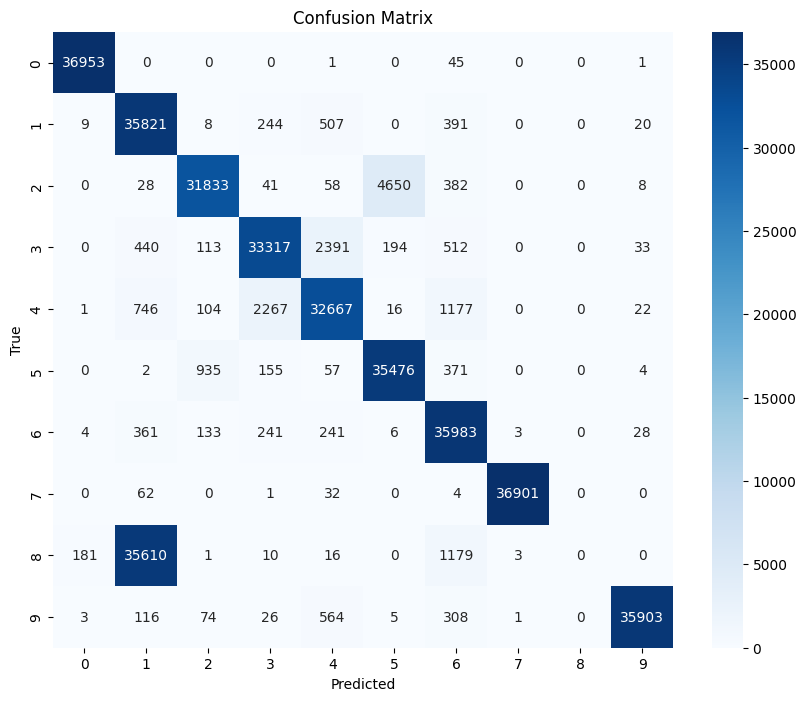

In [62]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overall_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()